# 线性回归的概念

1、线性回归的原理  
  
2、线性回归损失函数、代价函数、目标函数  
  
3、优化方法(梯度下降法、牛顿法、拟牛顿法等)  
  
4、线性回归的评估指标  
  
5、sklearn参数详解

## 1、线性回归的原理




进入一家房产网，可以看到房价、面积、厅室呈现以下数据：


<table>
    <tr>
        <th>面积($x_1$)</th>
        <th>厅室数量($x_2)$</th>
        <th>价格(万元)(y)</th>
    </tr>
    <tr>
        <th>64</th>
        <th>3</th>
        <th>225</th>
    </tr>
    <tr>
        <th>59</th>
        <th>3</th>
        <th>185</th>
    </tr>
    <tr>
        <th>65</th>
        <th>3</th>
        <th>208</th>
    </tr>
    <tr>
        <th>116</th>
        <th>4</th>
        <th>508</th>
    </tr>
    <tr>
        <th>……</th>
        <th>……</th>
        <th>……</th>
    </tr>

我们可以将价格和面积、厅室数量的关系习得为$f(x)=\theta_0+\theta_1x_1+\theta_2x_2$，使得$f(x)\approx y$，这就是一个直观的线性回归的样式。

<td bgcolor=#87CEEB>
    <font size =2>
小练习：这是国内一个房产网站上任意搜的数据，有兴趣可以找个网站观察一下，还可以获得哪些可能影响到房价的因素？可能会如何影响到实际房价呢？</font>
</td>

【答】地理位置；学区房；附近交通、学校和医疗设施情况等

### 线性回归的一般形式：
有数据集$\{(x_1,y_1),(x_2,y_2),...,(x_n,y_n)\}$,其中,$x_i = (x_{i1};x_{i2};x_{i3};...;x_{id}),y_i\in R$<br> 
其中n表示变量的数量，d表示每个变量的维度。  
可以用以下函数来描述y和x之间的关系：

\begin{align*}
f(x) 
&= \theta_0 + \theta_1x_1 + \theta_2x_2 + ... + \theta_dx_d  \\
&= \sum_{i=0}^{d}\theta_ix_i \\
\end{align*}

如何来确定$\theta$的值，使得$f(x)$尽可能接近y的值呢？均方误差是回归中常用的性能度量，即：

$$J(\theta)=\frac{1}{2}\sum_{j=1}^{n}(h_{\theta}(x^{(i)})-y^{(i)})^2$$<br>  

我们可以选择$\theta$，试图让均方误差最小化：

### 极大似然估计（概率角度的诠释）

下面我们用极大似然估计，来解释为什么要用均方误差作为性能度量

我们可以把目标值和变量写成如下等式：

$$
y^{(i)} = \theta^T x^{(i)}+\epsilon^{(i)}
$$

$\epsilon$表示我们未观测到的变量的印象，即随机噪音。我们假定$\epsilon$是独立同分布，服从高斯分布。（根据中心极限定理）

$$
p(\epsilon^{(i)}) = \frac{1}{\sqrt{2\pi}\sigma}exp\left(-\frac{(\epsilon^{(i)})^2}{2\sigma^2}\right)$$


因此，

$$
p(y^{(i)}|x^{(i)};\theta) = \frac{1}{\sqrt{2\pi}\sigma}exp\left(-\frac{(y^{(i)}-\theta^T x^{(i)})^2}{2\sigma^2}\right)
$$

我们建立极大似然函数，即描述数据遵从当前样本分布的概率分布函数。由于样本的数据集独立同分布，因此可以写成

$$
L(\theta) = p(\vec y | X;\theta) = \prod^n_{i=1}\frac{1}{\sqrt{2\pi}\sigma}exp\left(-\frac{(y^{(i)}-\theta^T x^{(i)})^2}{2\sigma^2}\right)
$$

选择$\theta$，使得似然函数最大化，这就是极大似然估计的思想。

为了方便计算，我们计算时通常对对数似然函数求最大值：

\begin{align*}
l(\theta) 
&= log L(\theta) = log \prod^n_{i=1}\frac{1}{\sqrt{2\pi}\sigma}exp\left(-\frac{(y^{(i)}-\theta^T x^{(i)})^2} {2\sigma^2}\right) \\
& = \sum^n_{i=1}log\frac{1}{\sqrt{2\pi}\sigma}exp\left(-\frac{(y^{(i)}-\theta^T x^{(i)})^2}{2\sigma^2}\right) \\
& = nlog\frac{1}{{\sqrt{2\pi}\sigma}} - \frac{1}{\sigma^2} \cdot \frac{1}{2}\sum^n_{i=1}((y^{(i)}-\theta^T x^{(i)})^2
\end{align*}

显然，最大化$l(\theta)$即最小化 $\frac{1}{2}\sum^n_{i=1}((y^{(i)}-\theta^T x^{(i)})^2$。

这一结果即均方误差，因此用这个值作为代价函数来优化模型在统计学的角度是合理的。

## 2、线性回归损失函数、代价函数、目标函数
* 损失函数(Loss Function)：度量单样本预测的错误程度，损失函数值越小，模型就越好。
* 代价函数(Cost Function)：度量全部样本集的平均误差。
* 目标函数(Object Function)：代价函数和正则化函数，最终要优化的函数。

常用的损失函数包括：0-1损失函数、平方损失函数、绝对损失函数、对数损失函数等；常用的代价函数包括均方误差、均方根误差、平均绝对误差等。

<td bgcolor=#87CEEB>思考题：既然代价函数已经可以度量样本集的平均误差，为什么还要设定目标函数？</td>

#### 回答：
当模型复杂度增加时，有可能对训练集可以模拟的很好，但是预测测试集的效果不好，出现过拟合现象，这就出现了所谓的“结构化风险”。结构风险最小化即为了防止过拟合而提出来的策略，定义模型复杂度为$J(F)$，目标函数可表示为：

$$\underset{f\in F}{min}\, \frac{1}{n}\sum^{n}_{i=1}L(y_i,f(x_i))+\lambda J(F)$$

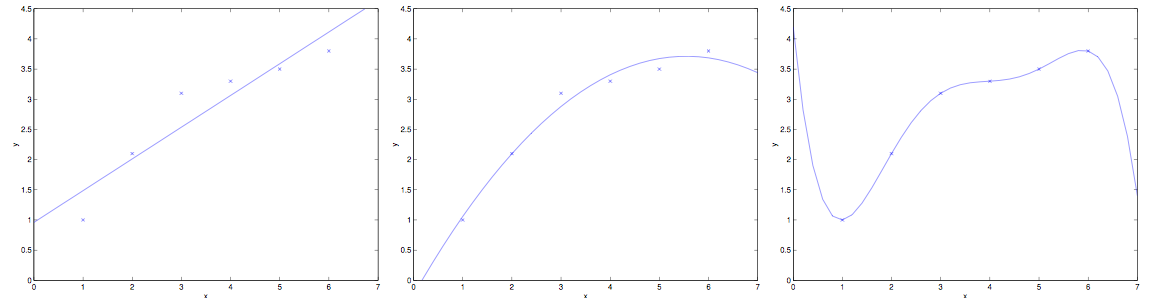

例如有以上6个房价和面积关系的数据点，可以看到，当设定$f(x)=\sum_{j=0}^{5}\theta_jx_j$时，可以完美拟合训练集数据，但是，真实情况下房价和面积不可能是这样的关系，出现了过拟合现象。当训练集本身存在噪声时，拟合曲线对未知影响因素的拟合往往不是最好的。
通常，随着模型复杂度的增加，训练误差会减少；但测试误差会先增加后减小。我们的最终目的时试测试误差达到最小，这就是我们为什么需要选取适合的目标函数的原因。

## 3、线性回归的优化方法

### 1、梯度下降法

设定初始参数$\theta$,不断迭代，使得$J(\theta)$最小化：
$$\theta_j:=\theta_j-\alpha\frac{\partial{J(\theta)}}{\partial\theta}$$

\begin{align*}
\frac{\partial{J(\theta)}}{\partial\theta} 
&= \frac{\partial}{\partial\theta_j}\frac{1}{2}\sum_{i=1}^{n}(f_\theta(x)^{(i)}-y^{(i)})^2 \\
&= 2*\frac{1}{2}\sum_{i=1}^{n}(f_\theta(x)^{(i)}-y^{(i)})*\frac{\partial}{\partial\theta_j}(f_\theta(x)^{(i)}-y^{(i)}) \\
&= \sum_{i=1}^{n}(f_\theta(x)^{(i)}-y^{(i)})*\frac{\partial}{\partial\theta_j}(\sum_{j=0}^{d}\theta_jx_j^{(i)}-y^{(i)}))\\
&= \sum_{i=1}^{n}(f_\theta(x)^{(i)}-y^{(i)})x_j^{(i)} \\
\end{align*}

即：

$$
\theta_j = \theta_j + \alpha\sum_{i=1}^{n}(y^{(i)}-f_\theta(x)^{(i)})x_j^{(i)}
$$

注：下标j表示第j个参数，上标i表示第i个数据点。

将所有的参数以向量形式表示，可得：

$$
\theta = \theta + \alpha\sum_{i=1}^{n}(y^{(i)}-f_\theta(x)^{(i)})x^{(i)}
$$

由于这个方法中，参数在每一个数据点上同时进行了移动，因此称为批梯度下降法，对应的，我们可以每一次让参数只针对一个数据点进行移动，即：

$$
\theta = \theta + \alpha(y^{(i)}-f_\theta(x)^{(i)})x^{(i)}
$$

这个算法成为随机梯度下降法，随机梯度下降法的好处是，当数据点很多时，运行效率更高；缺点是，因为每次只针对一个样本更新参数，未必找到最快路径达到最优值，甚至有时候会出现参数在最小值附近徘徊而不是立即收敛。但当数据量很大的时候，随机梯度下降法经常优于批梯度下降法。

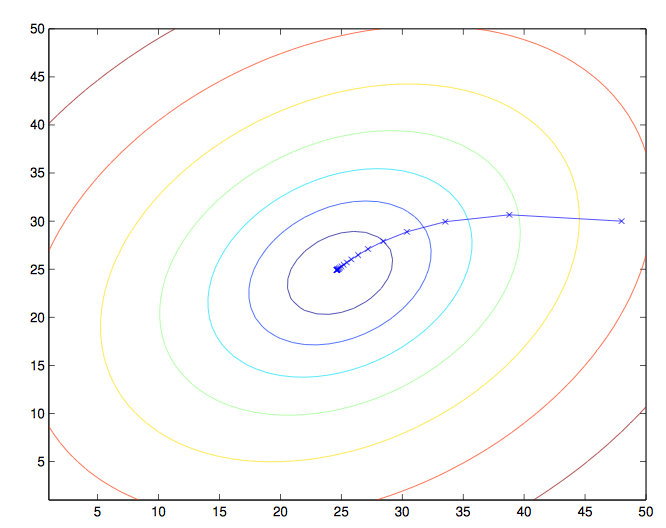

当J为凸函数时，梯度下降法相当于让参数$\theta$不断向J的最小值位置移动

梯度下降法的缺陷：如果函数为非凸函数，有可能找到的并非全局最优值，而是局部最优值。

### 2、最小二乘法矩阵求解

令<br>
$$ X = \left[ \begin{array} {cccc}
(x^{(1)})^T\\
(x^{(2)})^T\\
\ldots \\
(x^{(n)})^T
\end{array} \right] $$

其中，

$$x^{(i)} = \left[ \begin{array} {cccc}
x_1^{(i)}\\
x_2^{(i)}\\
\ldots \\
x_d^{(i)}
\end{array} \right]$$

由于

$$Y = \left[ \begin{array} {cccc}
y^{(1)}\\
y^{(2)}\\
\ldots \\
y^{(n)}
\end{array} \right]$$

$h_\theta(x)$可以写作

$$h_\theta(x)=X\theta$$

对于向量来说，有

$$z^Tz = \sum_i z_i^2$$

因此可以把损失函数写作

$$J(\theta)=\frac{1}{2}(X\theta-Y)^T(X\theta-Y)$$

### 【更正】线性代数中有两个公式：
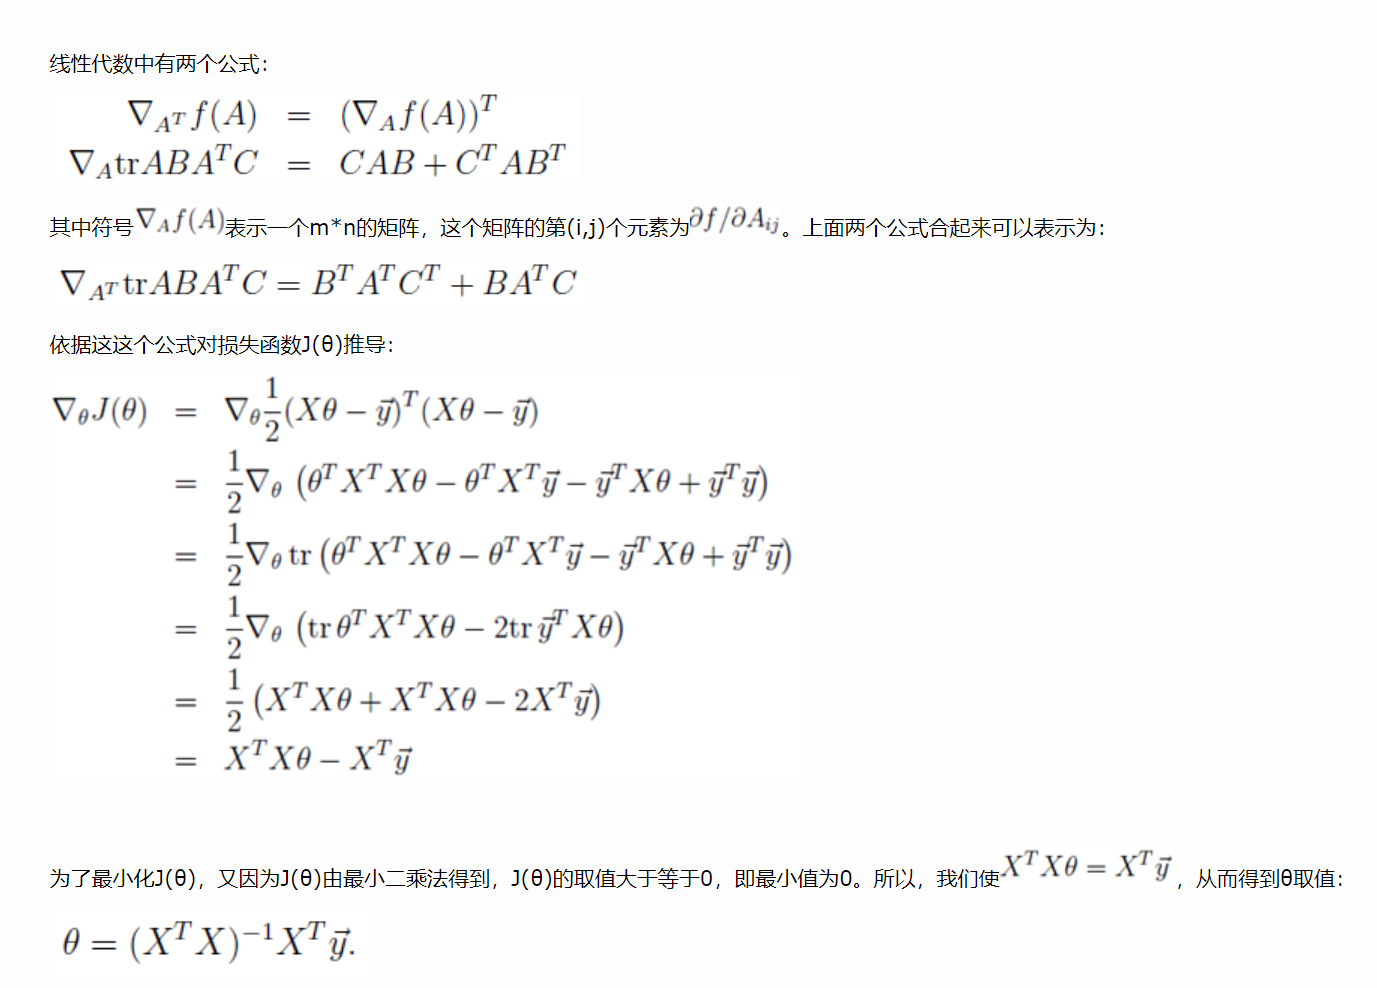

为最小化$J(\theta)$,对$\theta$求导可得：

\begin{align*}
\frac{\partial{J(\theta)}}{\partial\theta} 
&= \frac{\partial}{\partial\theta} \frac{1}{2}(X\theta-Y)^T(X\theta-Y) \\
&= \frac{1}{2}\frac{\partial}{\partial\theta} (\theta^TX^TX\theta - Y^TX\theta-\theta^T X^TY - Y^TY) \\
\end{align*}
应为
\begin{align*}
&= \frac{1}{2}\frac{\partial}{\partial\theta} (\theta^TX^TX\theta - Y^TX\theta-\theta^T X^TY + Y^TY) \\
\end{align*}

中间两项互为转置，由于求得的值是个标量，矩阵与转置相同，因此可以写成

\begin{align*}
\frac{\partial{J(\theta)}}{\partial\theta} 
&= \frac{1}{2}\frac{\partial}{\partial\theta} (\theta^TX^TX\theta - 2\theta^T X^TY - Y^TY) \\
\end{align*}
应为：
\begin{align*}
\frac{\partial{J(\theta)}}{\partial\theta} 
&= \frac{1}{2}\frac{\partial}{\partial\theta} (\theta^TX^TX\theta - 2\theta^T X^TY + Y^TY) \\
\end{align*}

令偏导数等于零，由于最后一项和$\theta$无关，偏导数为0。

因此，

$$\frac{\partial{J(\theta)}}{\partial\theta}  = \frac{1}{2}\frac{\partial}{\partial\theta} \theta^TX^TX\theta - \frac{\partial}{\partial\theta} \theta^T X^TY
$$

利用矩阵求导性质，<br>  




$$
\frac{\partial \vec x^T\alpha}{\partial \vec x} =\alpha 
$$

$$
和
$$

$$\frac{\partial A^TB}{\partial \vec x} = \frac{\partial A^T}{\partial \vec x}B + \frac{\partial B^T}{\partial \vec x}A$$


\begin{align*}
\frac{\partial}{\partial\theta} \theta^TX^TX\theta 
&= \frac{\partial}{\partial\theta}{(X\theta)^TX\theta}\\
&= \frac{\partial (X\theta)^T}{\partial\theta}X\theta + \frac{\partial (X\theta)^T}{\partial\theta}X\theta \\
&= 2X^TX\theta
\end{align*}

$$\frac{\partial{J(\theta)}}{\partial\theta} = X^TX\theta - X^TY
$$

令导数等于零，

$$X^TX\theta = X^TY$$

$$\theta = (X^TX)^{(-1)}X^TY
$$

注：CS229视频中吴恩达的推导利用了矩阵迹的性质，可自行参考学习。

### 3、牛顿法

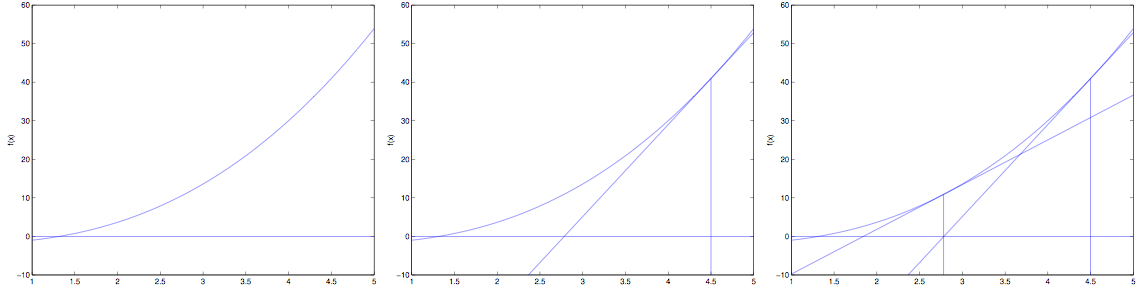

通过图例可知(参考吴恩达CS229),

$$f(\theta)' = \frac{f(\theta)}{\Delta},\Delta = \theta_0 - \theta_1$$

$$可求得，\theta_1 = \theta_0 - \frac {f(\theta_0)}{f(\theta_0)'}$$

重复迭代，可以让逼近取到$f(\theta)$的最小值

当我们对损失函数$l(\theta)$进行优化的时候，实际上是想要取到$l'(\theta)$的最小值，因此迭代公式为：

$$
\theta :=\theta-\frac{l'(\theta)}{l''(\theta)}
$$

$$
当\theta是向量值的时候，\theta :=\theta - H^{-1}\Delta_{\theta}l(\theta)
$$

其中，$\Delta_{\theta}l(\theta)$是$l(\theta)$对$\theta_i$的偏导数，$H$是$J(\theta)$的海森矩阵，<br>
$$H_{ij} = \frac{\partial ^2l(\theta)}{\partial\theta_i\partial\theta_j}$$

问题：请用泰勒展开法推导牛顿法公式。

Answer：将$f(x)$用泰勒公式展开到第二阶，

$f(x) = f(x_0) + f'(x_0)(x - x_0)+\frac{1}{2}f''(x_0)(x - x_0)^2$

对上式求导，并令导数等于0，求得x值

$$f'(x) = f'(x_0) + f''(x_0)x -f''(x_0)x_0 = 0$$

可以求得，

$$x = x_0 - \frac{f'(x_0)}{f''(x_0)}$$

牛顿法的收敛速度非常快，但海森矩阵的计算较为复杂，尤其当参数的维度很多时，会耗费大量计算成本。我们可以用其他矩阵替代海森矩阵，用拟牛顿法进行估计

### 4、拟牛顿法

拟牛顿法的思路是用一个矩阵替代计算复杂的海森矩阵H，因此要找到符合H性质的矩阵。

要求得海森矩阵符合的条件，同样对泰勒公式求导$f'(x) = f'(x_0) + f''(x_0)x -f''(x_0)x_0$

令$x = x_1$，即迭代后的值，代入可得：

$$f'(x_1) = f'(x_0) + f''(x_0)x_1 - f''(x_0)x_0$$

更一般的，

$$f'(x_{k+1}) = f'(x_k) + f''(x_k)x_{k+1} - f''(x_k)x_k$$

$$f'(x_{k+1}) - f'(x_k)  = f''(x_k)(x_{k+1}- x_k)= H(x_{k+1}- x_k)$$

$x_k$为第k个迭代值

即找到矩阵G，使得它符合上式。
常用的拟牛顿法的算法包括DFP，BFGS等，作为选学内容，有兴趣者可自行查询材料学习。

## 4、线性回归的评价指标

均方误差(MSE):$\frac{1}{m}\sum^{m}_{i=1}(y^{(i)} - \hat y^{(i)})^2$

均方根误差(RMSE)：$\sqrt{MSE} = \sqrt{\frac{1}{m}\sum^{m}_{i=1}(y^{(i)} - \hat y^{(i)})^2}$

平均绝对误差(MAE)：$\frac{1}{m}\sum^{m}_{i=1} | (y^{(i)} - \hat y^{(i)} | $

但以上评价指标都无法消除量纲不一致而导致的误差值差别大的问题，最常用的指标是$R^2$,可以避免量纲不一致问题

$$R^2: = 1-\frac{\sum^{m}_{i=1}(y^{(i)} - \hat y^{(i)})^2}{\sum^{m}_{i=1}(\bar y - \hat y^{(i)})^2} =1-\frac{\frac{1}{m}\sum^{m}_{i=1}(y^{(i)} - \hat y^{(i)})^2}{\frac{1}{m}\sum^{m}_{i=1}(\bar y - \hat y^{(i)})^2} = 1-\frac{MSE}{VAR}$$

我们可以把$R^2$理解为，回归模型可以成功解释的数据方差部分在数据固有方差中所占的比例，$R^2$越接近1，表示可解释力度越大，模型拟合的效果越好。

【补充】R：皮尔逊相关系数

## 5、sklearn.linear_model参数详解：

fit_intercept : 默认为True,是否计算该模型的截距。如果使用中心化的数据，可以考虑设置为False,不考虑截距。注意这里是考虑，一般还是要考虑截距

normalize: 默认为false. 当fit_intercept设置为false的时候，这个参数会被自动忽略。如果为True,回归器会标准化输入参数：减去平均值，并且除以相应的二范数。当然啦，在这里还是建议将标准化的工作放在训练模型之前。通过设置sklearn.preprocessing.StandardScaler来实现，而在此处设置为false

copy_X : 默认为True, 否则X会被改写

n_jobs: int 默认为1. 当-1时默认使用全部CPUs ??(这个参数有待尝试)

可用属性：

coef_:训练后的输入端模型系数，如果label有两个，即y值有两列。那么是一个2D的array

intercept_: 截距

可用的methods:

fit(X,y,sample_weight=None):
X: array, 稀疏矩阵 [n_samples,n_features]
y: array [n_samples, n_targets]
sample_weight: 权重 array [n_samples]
在版本0.17后添加了sample_weight

get_params(deep=True)： 返回对regressor 的设置值

predict(X): 预测 基于 R^2值

score： 评估

参考https://blog.csdn.net/weixin_39175124/article/details/79465558

## 【摘自链接内容】下面用个例子：从数据产生，到数据提取，数据标准化，模型训练和评估来说明各个API的调用过程

补充：API?API（Application Programming Interface，应用程序接口）是一些预先定义的函数，或指软件系统不同组成部分衔接的约定。目的是提供应用程序与开发人员基于某软件或硬件得以访问一组例程的能力，而又无需访问原码，或理解内部工作机制的细节。

In [8]:
import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [10]:
## 设置字符集，防止中文乱码
mpl.rcParams['font.sans-serif']=[u'simHei']
mpl.rcParams['axes.unicode_minus']=False

In [11]:
# 定义目标函数通过改函数产生对应的y
# y=1*x[0]+2*x[1]+....(n+1)*x[n]
def l_model(x):
    params = np.arange(1,x.shape[-1]+1)
    y = np.sum(params*x)+np.random.randn(1)*0.1
    return y

# 定义数据集
x = pd.DataFrame(np.random.rand(500,6))
y = x.apply(lambda x_rows:pd.Series(l_model(x_rows)),axis=1)

# 划分训练集和测试集
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=2)

# 数据标准化
ss = StandardScaler()
x_train_s = ss.fit_transform(x_train)
x_test_s = ss.transform(x_test)

# 输出下原数据的标准差和平均数
print(ss.scale_)
print(ss.mean_)

[0.29664856 0.28394298 0.29077603 0.28976253 0.28442178 0.28190569]
[0.52433554 0.48056059 0.53235731 0.48312911 0.46006105 0.54321565]


In [12]:
# 训练模型
lr = LinearRegression()
lr.fit(x_train_s,y_train)

print(lr.coef_)
print(lr.intercept_)

[[0.30417278 0.57123852 0.8752256  1.16755581 1.42578266 1.69035052]]
[10.57452294]


In [13]:
# 用模型预测
y_predict=lr.predict(x_test_s)
lr.score(x_test_s,y_test)

0.998737306294937

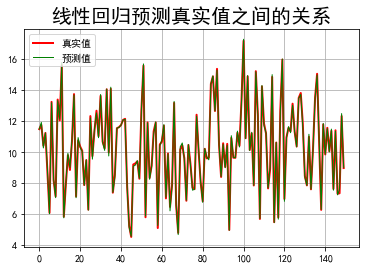

In [14]:
## 预测值和实际值画图比较
t=np.arange(len(x_test_s))
plt.figure(facecolor='w')#建一个画布，facecolor是背景色
plt.plot(t, y_test, 'r-', linewidth=2, label='真实值')
plt.plot(t, y_predict, 'g-', linewidth=1, label='预测值')
plt.legend(loc = 'upper left')#显示图例，设置图例的位置
plt.title("线性回归预测真实值之间的关系", fontsize=20)
plt.grid(b=True)#加网格
plt.show()

<table align ="left";background-color="#87CEEB">
<tr>
    <td bgcolor="#87CEEB"><font size=2>练习题：请用以下数据（可自行生成尝试，或用其他已有数据集）</font></td>
</tr>
<tr>
<td  bgcolor="#87CEEB"><font size=2>1、首先尝试调用sklearn的线性回归函数进行训练；</font></td>
</tr>
<tr>
<td bgcolor="#87CEEB"><font size=2>2、用最小二乘法的矩阵求解法训练数据；</font></td>
</tr>
<tr>    
<td  bgcolor="#87CEEB"><font size=2>3、用梯度下降法训练数据；</font></td>
</tr>
<tr>
    <td  bgcolor="#87CEEB"><font size=2>4、比较各方法得出的结果是否一致。</font></td>
</tr>
</table>

生成数据

In [2]:
#生成数据
import numpy as np
#生成随机数
np.random.seed(1234)
x = np.random.rand(500,3)
#构建映射关系，模拟真实的数据待预测值,映射关系为y = 4.2 + 5.7*x1 + 10.8*x2，可自行设置值进行尝试
y = x.dot(np.array([4.2,5.7,10.8]))

#### 1、先尝试调用sklearn的线性回归模型训练数据

In [3]:
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
%matplotlib inline

# 调用模型
lr = LinearRegression(fit_intercept=True)
# 训练模型
lr.fit(x,y)
print("估计的参数值为：%s" %(lr.coef_))
# 计算R平方
print('R2:%s' %(lr.score(x,y)))
# 任意设定变量，预测目标值
x_test = np.array([2,4,5]).reshape(1,-1)
y_hat = lr.predict(x_test)
print("预测值为: %s" %(y_hat))


估计的参数值为：[ 4.2  5.7 10.8]
R2:1.0
预测值为: [85.2]


#### 2、最小二乘法的矩阵求解

In [4]:
class LR_LS():
    def __init__(self):
        self.w = None      
    def fit(self, X, y):
        # 最小二乘法矩阵求解
        #============================= show me your code =======================
        self.w = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(y)
        #============================= show me your code =======================
    def predict(self, X):
        # 用已经拟合的参数值预测新自变量
        #============================= show me your code =======================
        y_pred = X.dot(self.w)
        #============================= show me your code =======================
        return y_pred

if __name__ == "__main__":
    lr_ls = LR_LS()
    lr_ls.fit(x,y)
    print("估计的参数值：%s" %(lr_ls.w))
    x_test = np.array([2,4,5]).reshape(1,-1)
    print("预测值为: %s" %(lr_ls.predict(x_test)))

    

估计的参数值：[ 4.2  5.7 10.8]
预测值为: [85.2]


3、梯度下降法

In [5]:
class LR_GD():
    def __init__(self):
        self.w = None     
    def fit(self,X,y,alpha=0.02,loss = 1e-10): # 设定步长为0.002,判断是否收敛的条件为1e-10
        y = y.reshape(-1,1) #重塑y值的维度以便矩阵运算
        [m,d] = np.shape(X) #自变量的维度
        self.w = np.zeros((d)) #将参数的初始值定为0
        tol = 1e5
        #============================= show me your code =======================
        while tol > loss:
            h_f = X.dot(self.w).reshape(-1,1) 
            theta = self.w + alpha*np.mean(X*(y - h_f),axis=0) #计算迭代的参数值
            tol = np.sum(np.abs(theta - self.w))
            self.w = theta
        #============================= show me your code =======================
    def predict(self, X):
        # 用已经拟合的参数值预测新自变量
        y_pred = X.dot(self.w)
        return y_pred  

if __name__ == "__main__":
    lr_gd = LR_GD()
    lr_gd.fit(x,y)
    print("估计的参数值为：%s" %(lr_gd.w))
    x_test = np.array([2,4,5]).reshape(1,-1)
    print("预测值为：%s" %(lr_gd.predict(x_test)))

估计的参数值为：[ 4.20000001  5.70000003 10.79999997]
预测值为：[85.19999995]


## 参考

吴恩达 CS229课程

周志华 《机器学习》

李航 《统计学习方法》

https://hangzhou.anjuke.com/

https://www.jianshu.com/p/e0eb4f4ccf3e

机器学习-极大似然估计
极大似然估计方法在机器学习中用的非常多，是一个必须要掌握的知识点。在周志华《机器学习》中这一章讲的较为简略，以下我将用简单的例子解释下极大似然估计。

极大似然估计是什么意思？

似然（likelihood），其实就是可能性的意思。体重为5kg的猫是橘猫的可能性是多少？在这里我们称为体重为5kg是橘猫的似然是多少？
极大似然估计是一种统计学的方法，我们用已知的样本数据分布去推测具体的分布情况。

为什么我们要使用极大似然估计？

当我们使用机器学习解决具体现实问题时，我们是无法确切知道具体的数据分布情况的。例如我们现在想知道橘猫的体重分布，显然，我们是无法一只只去测的。这种情况在机器学习中非常普遍，那我们可不可以用部分已知数据去预测整体的分布呢？极大似然估计就是一个解决这类问题的方法。但是，这并不是绝对准确的，只能说实际情况最有可能接近这种猜测的分布。
使用极大似然估计方法的两个条件:

1.我们假定数据服从某种已知的特定数据分布型。
2.我们已经得到了一定的数据集。

【以下用我们估计橘猫体重的分布情况举例】

根据现实经验和科学道理，我们可以确切得到两个条件。
1.动物的体重分布是符合正态分布的。（也可以说我们假定它服从正态分布）
2.我们抓住了学校里所有的橘猫，得到了100只橘猫的体重。
那么如何用这100只橘猫的数据集D去推测橘猫具体的体重分布呢？

我们将这100只橘猫体重设为数据集D:!

D服从一个数学期望为μ、标准方差为σ2的正态分布（也叫高斯分布），记为： D∼N(μ,σ2)

这里有两个参数，期望μ决定了分布图形在坐标轴中的位置，σ决定了分布图形的幅度。（正态分布的图像根据参数都会有不一样的形态）

于是，我们最终要解决的问题就是如何确定参数μ和σ，为了方便起见我一们一般把参数写成一个参数向量θ=（μ，σ）。

我们把在参数向量θ下的正态分布下，某只一定体重的猫是橘猫的概率密度写做：

我们将统计到的100只橘猫数据集D在参数向量θ下的正态分布下可能性用连乘处理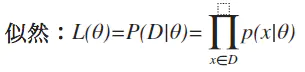

为什么我们要求L（θ）的最大呢？

如下图例子现在有三只猫，10kg，20kg，30kg他们都是橘猫，我们已经知道它们服从正太分布，那么基于目前手上的数据，到底是哪一种分布更可能呢？显然是左边的，因为根据实际情况，这种出现的可能性最大（你在一堆橘猫中随意抓，最容易抓到体重趋于中位的那些个体）。的确右边这种情况也是会出现的，极大似然估计并不是百分百准确，但在数据量足够的情况下，还是可信的。所以我们理应相信左边这种情况更加靠谱。

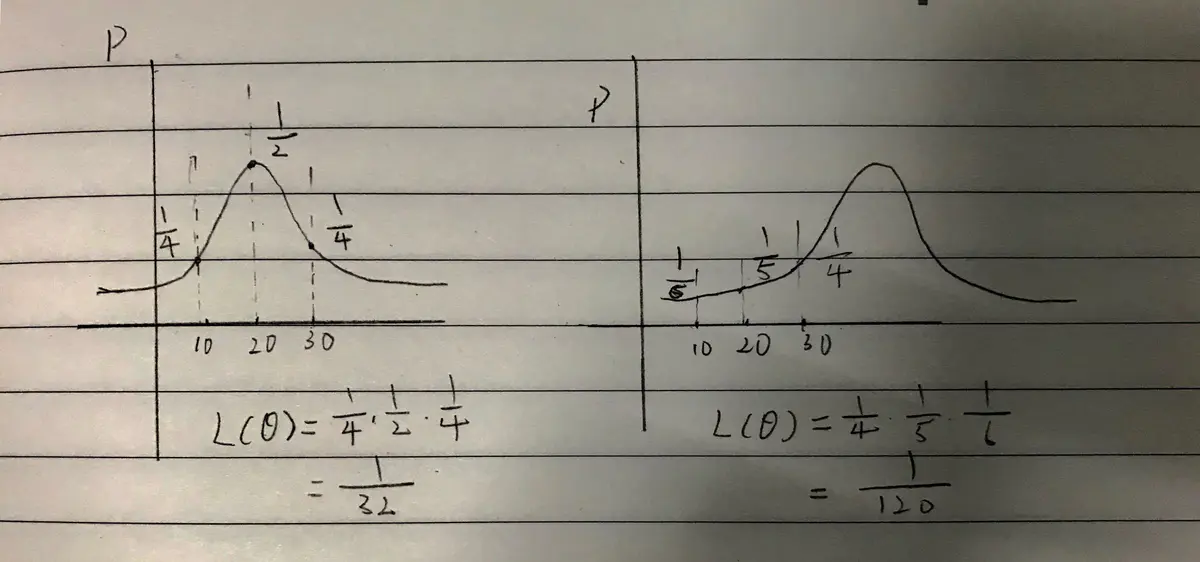

于是我们的目标就是关于L(θ)函数最大值时参数向量θ的取值

但在实际情况下我们会取对数

因为就我们上图这个简单的例子而言它的值就非常小了，实际情况更小，容易超出计算机的浮点范围，造成下溢。而且取ln相当于把连乘转化成累加，更加方便于求偏导计算极值。
根据分布函数不同，具体求解似然函数的过程也有所差异，这里不做讨论。

https://blog.csdn.net/qq_28448117/article/details/79199835

参考知乎回答整理：https://www.zhihu.com/question/52398145

主要参考：https://www.zhihu.com/question/52398145/answer/209358209

基本概念：

损失函数：计算的是一个样本的误差

代价函数：是整个训练集上所有样本误差的平均

目标函数：代价函数 + 正则化项

实际应用：

损失函数和代价函数是同一个东西，目标函数是一个与他们相关但更广的概念，举例说明：



上面三个图的曲线函数依次为f1(x),f2(x),f3(x)，我们想用这三个函数分别来拟合真实值Y。

我们给定x，这三个函数都会输出一个f(X)，这个输出的f(X)与真实值Y可能是相同的，也可能是不同的，为了表示我们拟合的好坏，我们就用一个函数来度量拟合的程度。这个函数就称为损失函数(loss function)，或者叫代价函数(cost function)。



损失函数越小，就代表模型拟合的越好。那是不是我们的目标就只是让loss function越小越好呢？还不是。这个时候还有一个概念叫风险函数(risk function)。风险函数是损失函数的期望，这是由于我们输入输出的(X,Y)遵循一个联合分布，但是这个联合分布是未知的，所以无法计算。但是我们是有历史数据的，就是我们的训练集，f(X)关于训练集的平均损失称作经验风险(empirical risk)，所以我们的目标就是最小化经验风险。



到这里完了吗？还没有。

如果到这一步就完了的话，那我们看上面的图，那肯定是最右面的f3(x)的经验风险函数最小了，因为它对历史的数据拟合的最好嘛。但是我们从图上来看它肯定不是最好的，因为它过度学习历史数据，导致它在真正预测时效果会很不好，这种情况称为过拟合(over-fitting)。为什么会造成这种结果？大白话说就是它的函数太复杂了，都有四次方了，这就引出了下面的概念，我们不仅要让经验风险最小化，还要让结构风险最小化。

这个时候就定义了一个函数J(f)，这个函数专门用来度量模型的复杂度，在机器学习中也叫正则化(regularization)。常用的有L1， L2范数。到这一步我们就可以说我们最终的优化函数是： 



即最优化经验风险和结构风险，而这个函数就被称为目标函数



https://blog.csdn.net/weixin_39175124/article/details/79465558